In [2]:
import numpy as np
import pandas as pd
import math 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('diamonds.csv')
data.head()
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [4]:
data.shape

(53940, 10)

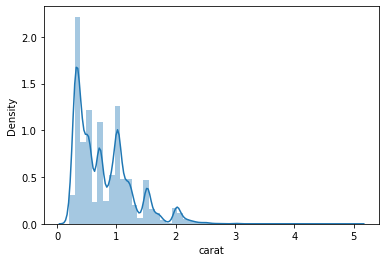

In [5]:
sns.distplot(data.carat);

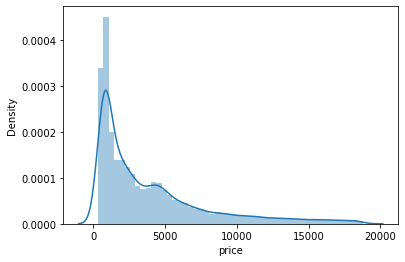

In [6]:
sns.distplot(data.price);

<AxesSubplot:xlabel='cut', ylabel='count'>

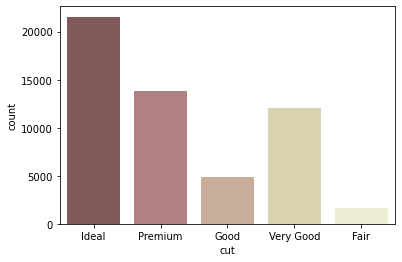

In [7]:
sns.countplot(data.cut,palette="pink")

<AxesSubplot:xlabel='clarity', ylabel='count'>

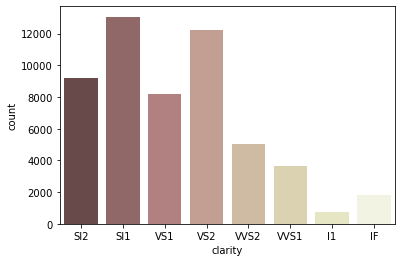

In [8]:
sns.countplot(data.clarity,palette="pink")

<AxesSubplot:xlabel='color', ylabel='count'>

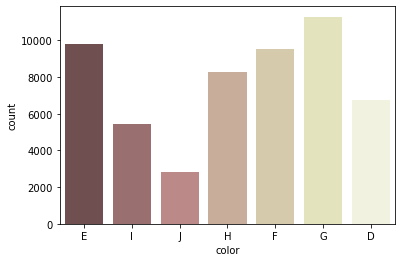

In [9]:
sns.countplot(data.color,palette="pink")

In [10]:
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)

In [11]:
data.shape

(53920, 10)

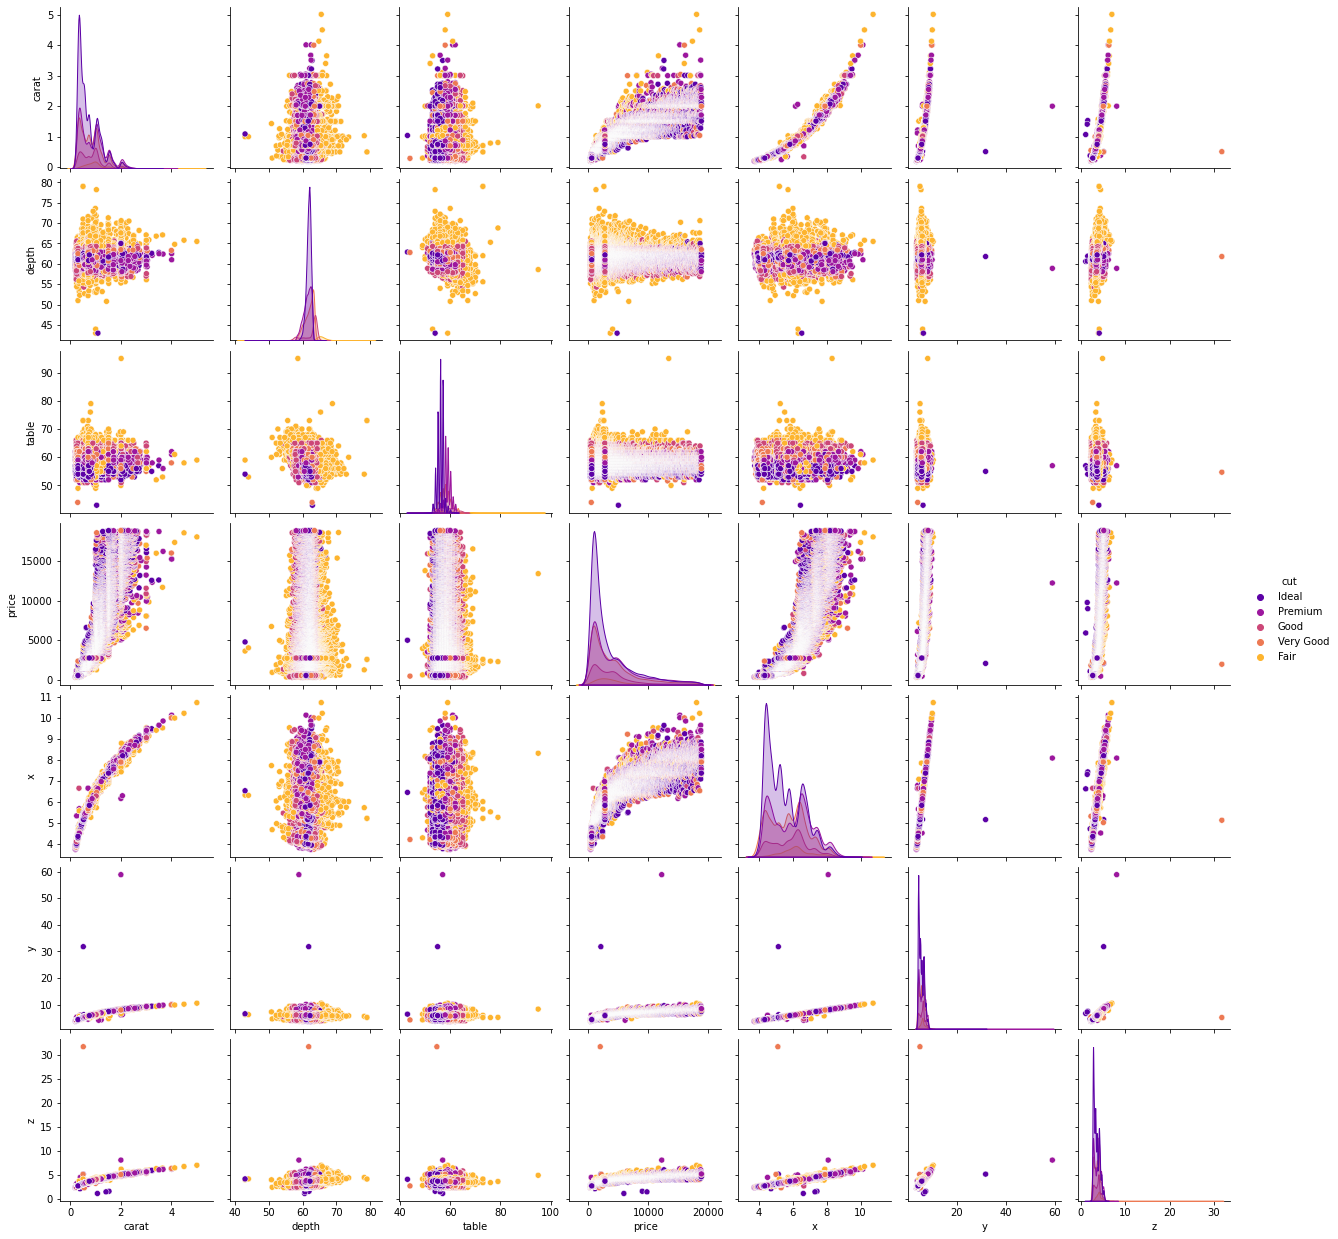

In [14]:
ax=sns.pairplot(data, hue= "cut", palette= 'plasma')

In [12]:
data = data[(data["depth"]<75)&(data["depth"]>45)]
data = data[(data["table"]<80)&(data["table"]>40)]
data = data[(data["x"]<30)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30)&(data["z"]>2)]
data.shape

(53907, 10)

Text(0.5, 0, 'Clarity')

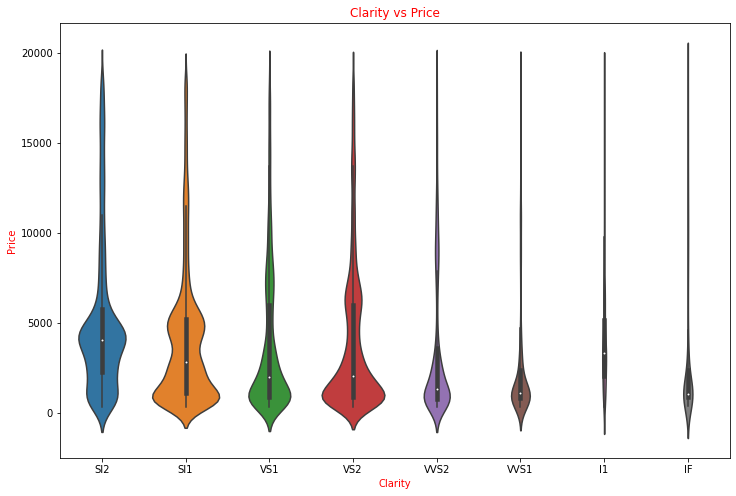

In [13]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="clarity",y="price", data=data,scale= "count")
ax.set_title("Clarity vs Price", color="r")
ax.set_ylabel("Price", color="r")
ax.set_xlabel("Clarity", color="r")

In [14]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler,  LabelEncoder
label_cut = LabelEncoder()
label_color = LabelEncoder()
label_clarity = LabelEncoder()
data['cut'] = label_cut.fit_transform(data['cut'])
data['color'] = label_color.fit_transform(data['color'])
data['clarity'] = label_clarity.fit_transform(data['clarity'])

In [15]:
data.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [17]:
from sklearn.model_selection import train_test_split
X = data.drop(['price'], axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [18]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<AxesSubplot:>

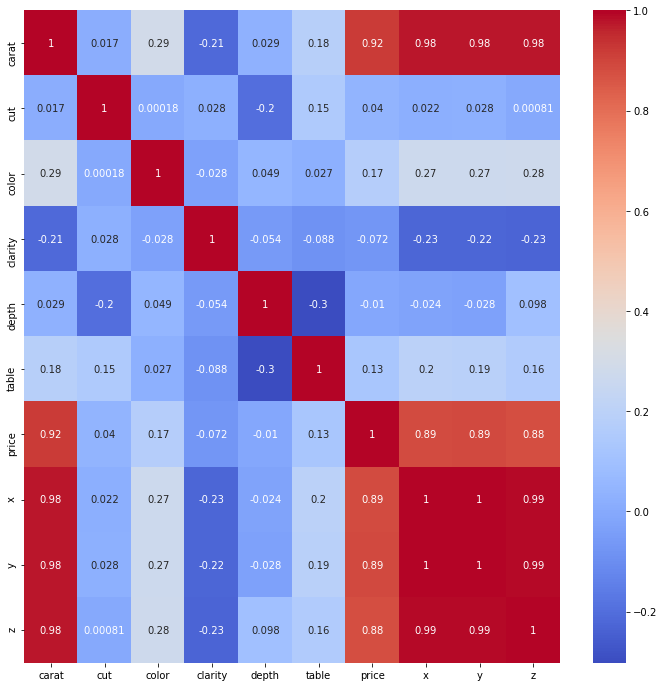

In [20]:
label_data = data.copy()
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap='coolwarm',annot=True)

<AxesSubplot:xlabel='depth', ylabel='price'>

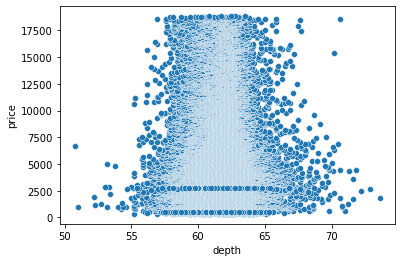

In [21]:
sns.scatterplot(data['depth'],data['price'])

<AxesSubplot:xlabel='color', ylabel='count'>

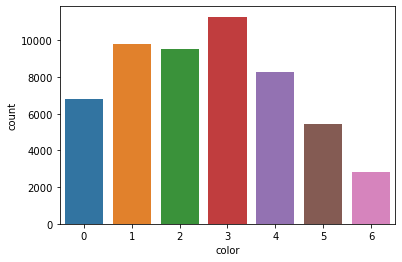

In [22]:
sns.countplot(data['color'])

<AxesSubplot:xlabel='clarity', ylabel='count'>

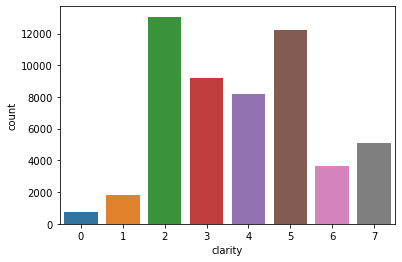

In [23]:
sns.countplot(data['clarity'])

<AxesSubplot:xlabel='cut', ylabel='count'>

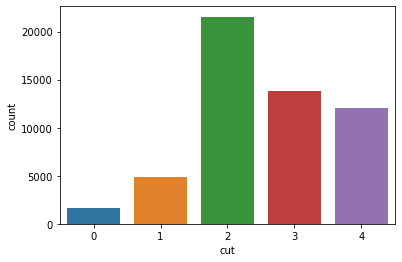

In [24]:
sns.countplot(data['cut'])


In [25]:
class KNN:
    def __init__(self,k):
        self.k=k
    def fit(self,X,y):
        self.X=np.asarray(X)
        self.y=np.asarray(y)
    def predict(self,X):
        X=np.asarray(X)
        res=[]
        for x in X:
            distance=np.sqrt(np.sum((x-self.X)**2,axis=1))
            ind=dis.argsort()
            ind=index[:self.k]
            res.append(np.mean(self.y[ind]))
        return np.array(res)

In [26]:
knn=KNN(k=3)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error
x1=mean_squared_error(y_test,y_pred)

In [28]:
from sklearn.metrics import r2_score
x2=r2_score(y_test,y_pred)

In [29]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
sk_pred = knn.predict(X_test)
y1=mean_squared_error(y_test,sk_pred)
y2=r2_score(y_test,sk_pred)
print(y1)
print(y2)

687945.7338190993
0.9573755595910266


<AxesSubplot:ylabel='count'>

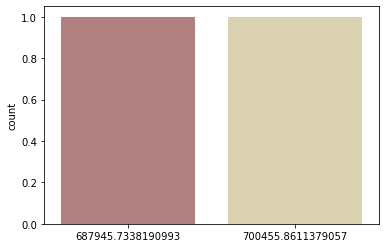

In [30]:
a = [x1,y1]
b = [x2,y2]
sns.countplot(a,palette="pink")

<AxesSubplot:ylabel='count'>

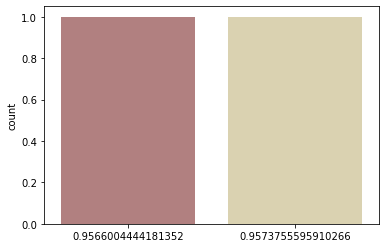

In [31]:
sns.countplot(b,palette="pink")